# How Can A Wellness Technology Company Play It Smart?

# Step 1: Scoping

#### Company Background

Bellabeat, founded by Urška Sršen and Sando Mur in 2013, produces health-focused smart products for women. They collect data on activity, sleep, stress, and reproductive health, empowering women with insights. The company rapidly expanded, using digital marketing extensively. In 2016, the co-founders sought to analyze smart device usage data to inform their marketing strategy for continued growth.

#### Business Task

Analyze FitBit Fitness Tracker usage data to understand consumer behavior and inform Bellabeat's marketing strategy.

#### Objectives

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### Deliverables

1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

---

## Step 2: Gathering

#### Data Details

The publicly available FitBit Fitness Tracker Data, found on Kaggle in 18 CSV files, originates from a distributed survey conducted through Amazon Mechanical Turk between March 12, 2016, and May 12, 2016, involving 30 consenting FitBit users who submitted their personal tracker data. 

This data encompasses five key categories: 
1. Recorded physical activity in minutes
2. Heart rate
3. Sleep monitoring 
4. Daily activity
5. Step counts

#### Data Limitations

Possible drawbacks of data collected from distributed surveys include selection and non-response bias, self-reporting inaccuracies, limited control, privacy concerns, and difficulty in verifying responses.
The sample size is low with only 33 female participants.
There are no demographics provided.
The data is over 6 years old and not relevant.

#### Data Selection

The following file is selected for analysis.
```
dailyActivity_merged.csv
```

## Step 3: Cleaning 

Python is being used to prepare and process the data in a Jupyter Notebook.

In [181]:
#import packages

import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt

In [182]:
#import the dataset
daily_activity = pd.read_csv("data/dailyActivity_merged.csv")

In [183]:
# Explore the dataset
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [184]:
daily_activity.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [185]:
# Check the amount of rown and columns in the dataset
daily_activity.shape

(940, 15)

In [186]:
# Count the duplicate rows in the dataset
daily_activity.duplicated().sum()

0

In [187]:
# Check for missing values
missing_values_count = daily_activity.isnull().sum()

missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [188]:
# Count the number of uniuqe IDs

unique_id = len(pd.unique(daily_activity["Id"]))

print('This dataset contains ' + str(unique_id) + ' unique participants.')

This dataset contains 33 unique participants.


In [189]:
# Show the dataset information
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [190]:
# convert ActivityDate to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

In [195]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,3
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,4
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,5
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,0
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,3


In [197]:
# Get the day of the week from ActivityDate and create a new column 
daily_activity["Weekday"] = daily_activity["ActivityDate"].dt.day_name()

# Set the custom offset to make Sunday the start of the week (6)
daily_activity['Weekday'] = (daily_activity['ActivityDate'].dt.dayofweek + 1) % 7

# Map the numeric values to day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_activity['Weekday'] = daily_activity['Weekday'].map(lambda x: day_names[x])

In [198]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [200]:
# create new column "total_mins" containing sum of total minutes.
daily_activity["TotalMins"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalMins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMins, dtype: int64

In [199]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [202]:
# create new column *total_hours* by converting to hour and round float to two decimal places
daily_activity["TotalHours"] = round(daily_activity["TotalMins"] / 60)

In [201]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,TotalMins
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040


## Step 4: Exploring

Pull statistics and perform calculations for further analysis

In [203]:
# pull general statistics
daily_activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMins,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


### Observations

**Average Steps and Distance**: On average, users recorded 7,637 steps, which translates to approximately 5.4 kilometers. This average falls below the recommended activity level. According to the CDC, adult females are advised to aim for at least 10,000 steps or approximately 8 kilometers per day to realize the benefits of improved general health, weight loss, and fitness. (Source: Medical News Today article)

**Predominance of Sedentary Users**: A significant majority of users, constituting 81% of the total average minutes, fall into the category of sedentary users. On average, they logged approximately 991 minutes, equivalent to approximately 20 hours of sedentary activity.

**Average Calories Burned**: The average calorie burn for users is estimated at 2,303 calories, which is roughly equivalent to 0.6 pounds. It's important to note that a detailed interpretation of calorie burn is influenced by various factors, including age, weight, exercise, hormones, and daily calorie intake. These specific factors are not known, making it challenging to provide a more detailed analysis.

## Step 5: Sharing

Create the visualizations and communicate findings.

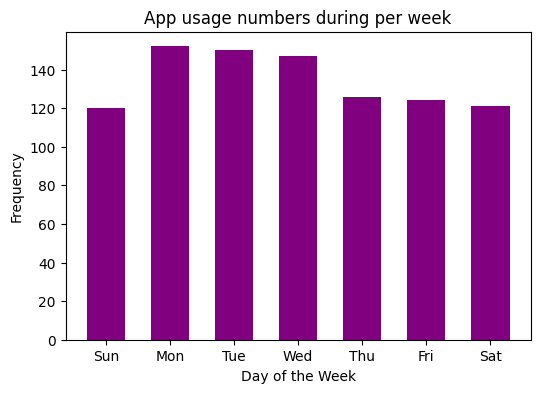

In [205]:
# Import matplotlib pyplot package
import matplotlib.pyplot as plt

# Calculate the frequency of each day
weekday_counts = daily_activity['ActivityDate'].dt.dayofweek
day_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
weekday_counts = weekday_counts.value_counts().reindex(range(7)).fillna(0)

# Create the histogram
plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.bar(weekday_counts.index, weekday_counts, width=0.6, color='purple')
plt.xticks(range(7), [day_names[i] for i in weekday_counts.index])

# Annotations
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.title("App usage numbers during per week")
plt.grid(False)
plt.show()


### Observations






**Frequency of FitBit App Usage Across the Week**: The histogram provides insights into the frequency of FitBit app usage based on days of the week.

**Midweek Peak (Tuesday to Friday)**: The analysis reveals that users tend to prefer or remember (giving them the benefit of the doubt that they may have forgotten) to track their activity on the app during the midweek, particularly from Tuesday to Friday.

**Weekend and Monday Decline**: Conversely, the frequency of app usage shows a noticeable drop on Friday, which continues into the weekend and Monday. This decline suggests a reduced emphasis on app activity tracking during these days.

The histogram highlights patterns in FitBit app usage, with midweek days from Tuesday to Friday standing out as the period when users are most engaged with the app, while a decline is observed during the weekend and on Monday.

In [257]:
# First, filter the data to create 'daily_use2'
filtered_data = daily_activity[daily_activity['TotalSteps'] > 200]

# Group by 'Id' and count occurrences of 'ActivityDate'
grouped_data = filtered_data.groupby('Id')['ActivityDate'].count().reset_index()

# Define a function to map 'ActivityDate' to 'Usage'
def map_to_usage(activity_count):
    if 1 <= activity_count <= 14:
        return "Low Use"
    elif 15 <= activity_count <= 21:
        return "Moderate Use"
    elif 22 <= activity_count <= 31:
        return "High Use"
    return None

# Apply the mapping function
grouped_data['Usage'] = grouped_data['ActivityDate'].apply(map_to_usage)

# Convert 'Usage' to a categorical variable with specified order
usage_order = ['Low Use', 'Moderate Use', 'High Use']
grouped_data['Usage'] = pd.Categorical(grouped_data['Usage'], categories=usage_order, ordered=True)

# Rename 'ActivityDate' to 'DaysUsed'
grouped_data = grouped_data.rename(columns={'ActivityDate': 'DaysUsed'})

# Group by 'Usage'
daily_use = grouped_data.groupby('Usage').count()

# Display the counts of each 'Usage' category
print(daily_use)

              Id  DaysUsed
Usage                     
Low Use        2         2
Moderate Use   7         7
High Use      24        24


/var/folders/mf/pbvnqxl55dvdvmgj9n9q45s00000gn/T/ipykernel_41422/2779597259.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_use = grouped_data.groupby('Usage').count()


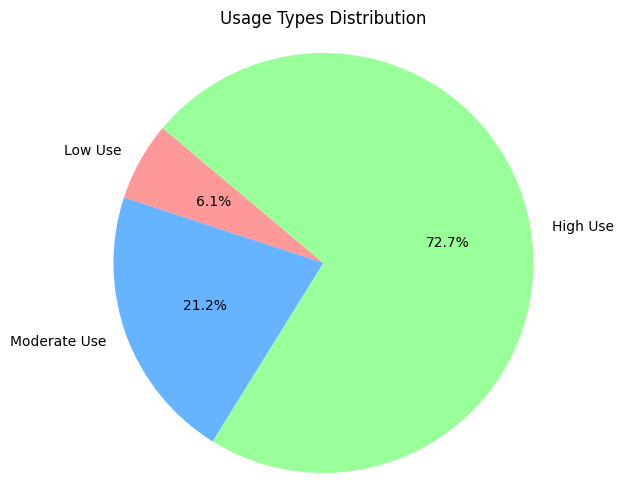

In [287]:
# Prepare usage counts for pie chart plotting
usage_counts = daily_use['Id'].reset_index()
usage_counts.columns = ['Usage', 'Count']

# Plot a pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(8, 6))
plt.pie(usage_counts['Count'], labels=usage_counts['Usage'], colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Usage Types Distribution')
plt.axis('equal')

plt.show()

### Observations

**Distribution of Usage Categories**: The pie chart serves as a visual representation of the distribution of "Usage" categories within the group. Notably, "High Use" emerges as the most prevalent category, followed by "Moderate Use" as the second most common, and "Low Use" as the least frequent category.

**Low Use (6.1%)**: "Low Use" constitutes 6.1% of the overall distribution. This category characterizes individuals with lower activity levels, signifying a minority within the group.

**High Use (72.7%)**: "High Use" stands out as the most dominant category, representing a substantial 72.7% of the total distribution. This category is indicative of individuals who engage in higher levels of activity and constitutes a significant majority.

**Moderate Use (21.2%)**: "Moderate Use" accounts for 21.2% of the distribution, signifying individuals with moderate activity levels. It represents a substantial portion of the group's activity patterns.

The pie chart effectively illustrates the distribution of "Usage" categories, with "High Use" being the most prevalent, "Low Use" as the least common, and "Moderate Use" occupying an intermediate position in the distribution of activity levels within the group.

In [214]:
# Merge 'daily_activity' and 'daily_use' based for usage types information
daily_activity_usage = pd.merge(daily_activity, daily_use2, on='Id', how='left')

# Calculate 'day' as the abbreviated day name
daily_activity_usage['day'] = daily_activity_usage['ActivityDate'].dt.strftime('%a')

# Calculate 'total_minutes_worn' as the sum of activity minutes
daily_activity_usage['total_minutes_worn'] = (
    daily_activity_usage['SedentaryMinutes'] +
    daily_activity_usage['LightlyActiveMinutes'] +
    daily_activity_usage['FairlyActiveMinutes'] +
    daily_activity_usage['VeryActiveMinutes']
)

# Define a function to format 'total_minutes_worn' in HH:MM:SS
def format_minutes(minutes):
    hours, remainder = divmod(minutes, 60)
    return f"{hours:02d}:{remainder:02d}:00"

# Apply the formatting function to 'total_minutes_worn'
daily_activity_usage['total_hours'] = daily_activity_usage['total_minutes_worn'].apply(format_minutes)

# Display the first 6 rows of 'daily_activity_usage'
print(daily_activity_usage.head(6))

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   
5  1503960366   2016-04-17        9705           6.48             6.48   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   
5                  

In [245]:
# Calculate the daily mean steps and reset the index to create a 'steps_hour' with daily step averages
steps_hour = daily_activity_usage.groupby('day').agg(mean_steps=('TotalSteps', 'mean')).round().reset_index()

# Define the order of days for the 'day' column, starting with Sunday
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
steps_hour['day'] = pd.Categorical(steps_hour['day'], categories=day_order, ordered=True)

# Fill in missing days with 0 mean_steps
steps_hour = steps_hour.set_index('day').reindex(day_order).fillna(0).reset_index()

# Display the first few rows of 'steps_hour'
print(steps_hour)


   day  mean_steps
0  Sun      6933.0
1  Mon      7781.0
2  Tue      8125.0
3  Wed      7559.0
4  Thu      7406.0
5  Fri      7448.0
6  Sat      8153.0


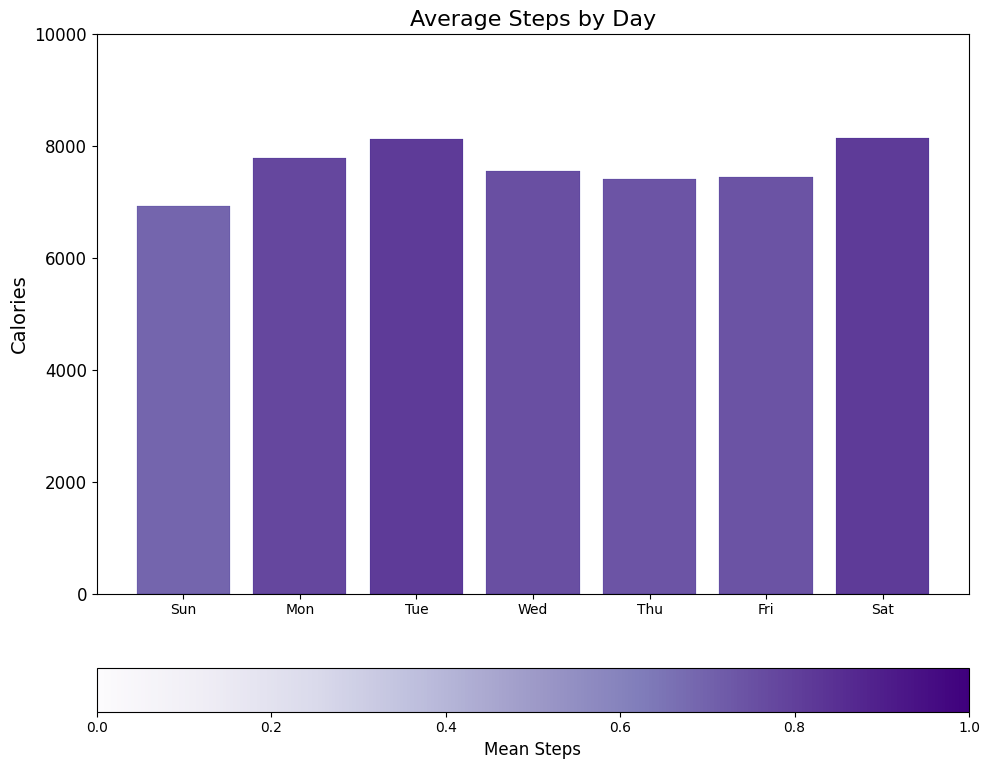

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'steps_hour' DataFrame is already defined

days = steps_hour['day']
mean_steps = steps_hour['mean_steps']

# Define the custom order for days of the week starting with Sunday
custom_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Reorder the 'days' column based on the custom order
days = days.astype(pd.CategoricalDtype(categories=custom_order, ordered=True))

# Create a color gradient for the bars
colors = plt.cm.Purples(np.interp(mean_steps, (0, 10000), (0, 1)))

# Create the bar chart with the custom order
plt.figure(figsize=(10, 8))
bars = plt.bar(days, mean_steps, color=colors, edgecolor="darkblue", linewidth=0.1)

# Set title and labels
plt.title("Average Steps by Day", fontsize=16)
plt.ylabel("Calories", fontsize=14)

# Set y-axis limits and ticks
plt.ylim(0, 10000)
plt.yticks(np.arange(0, 10001, 2000), fontsize=12)

# Create a color legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Purples)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='horizontal', pad=0.1)
cbar.set_label("Mean Steps", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Observations

**Peak Activity Days**: The data reveals that the highest step days occur on Saturday, closely followed by Tuesday and Monday. This pattern implies that individuals tend to be most active during the weekend and the early part of the workweek.

**Weekday Activity Decline**: In contrast, the step count shows a noticeable decrease over the remaining weekdays. This observation indicates a gradual decline in activity as the week progresses, with a consistent drop in step counts.

**Sunday as the Quietest Day**: Notably, Sunday emerges as the day with the fewest steps taken. This aligns with the conventional understanding of Sunday as a day of rest when physical activity tends to be lower compared to other days of the week.

**Overall Activity Pattern**: In summary, the data suggests a recurring pattern of activity where activity levels peak on Saturdays and gradually decrease as the week unfolds. This pattern culminates with Sunday as the least active day, which may be associated with rest and relaxation for most individuals.

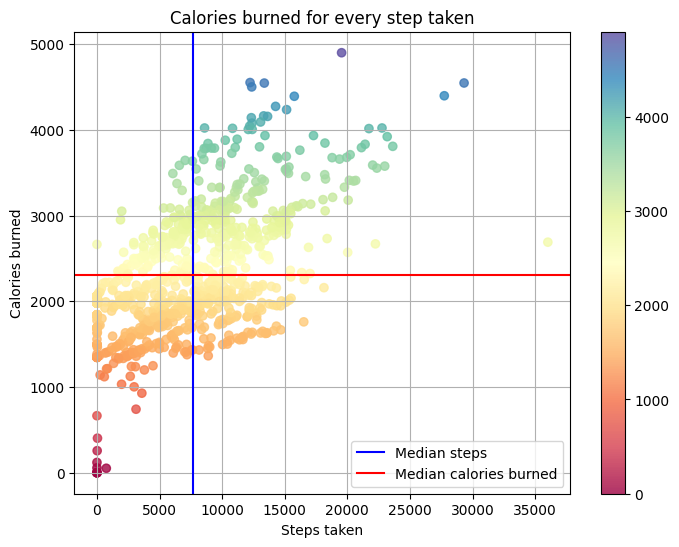

In [256]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(daily_activity.TotalSteps, df.Calories, 
            alpha = 0.8, c = df.Calories, 
            cmap = "Spectral")

# add annotations and visuals
MedianCalories = 2303
MedianSteps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(MedianSteps, color = "Blue", label = "Median steps")
plt.axhline(MedianCalories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

### Observations

The scatter plot analysis highlights the positive correlation between steps and calories burned, a trend of increasing calorie burn intensity within a certain step range, and the presence of outliers that may result from various factors, including data irregularities and user behavior changes.

**Positive Correlation**: The analysis of the scatter plot indicates a positive correlation between the number of steps taken and calories burned. As the number of steps increases, the calories burned also tend to increase, which is a notable trend.

**Intensity of Calories Burned**: The data shows that the intensity of calories burned tends to increase when users are in the range of more than zero to 15,000 steps. Beyond 15,000 steps, the rate at which calories are burned appears to decrease.

**Identification of Outliers**: Several outliers were identified within the data. These include instances where zero steps were taken, resulting in minimal or zero calories burned. Additionally, there is one observation where more than 35,000 steps were taken, but the calories burned were less than 3,000.

**Possible Reasons for Outliers**: These outliers could be attributed to natural variations in the data, changes in the user's activity patterns, or potential errors in data collection. Errors may include miscalculations, data contamination, or human errors in recording the information.


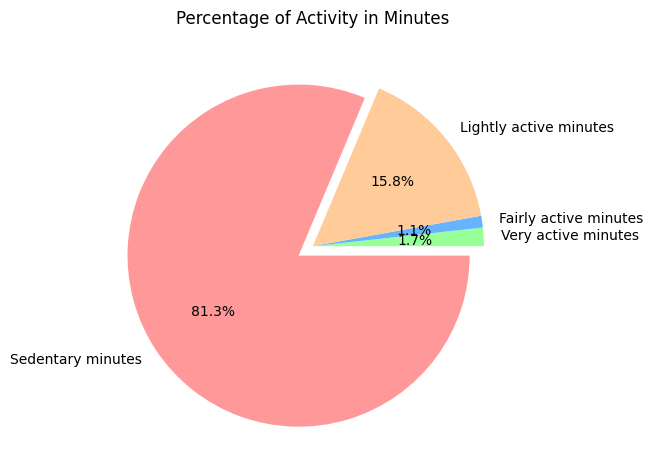

In [277]:
# calculating total of individual minutes column
very_active_mins = daily_activity["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colors = ['#99ff99', '#66b3ff', '#ffcc99', '#ff9999']
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colors, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

## Observations

#### Understanding App Usage

**Predominance of Sedentary Minutes (81.3%)**: The pie chart prominently illustrates that the largest segment, accounting for 81.3% of the distribution, corresponds to sedentary minutes. This observation suggests that users primarily employ the FitBit app for logging everyday activities, such as their daily commute, inactive movements (such as transitioning between spots), or running errands.

**Limited Fitness Tracking**: In contrast, the data reveals a minimal use of the app for fitness tracking activities, exemplified by the minor percentages of fairly active (1.1%) and very active (1.7%) activity segments. This trend raises concerns as it appears to be inconsistent with the primary objective of the FitBit app, which is to encourage and facilitate fitness-oriented tracking.

The significant predominance of sedentary minutes highlights the practical, everyday use of the app, while the underutilization of fitness tracking features suggests the need for strategies to promote and encourage fitness-related app usage.

---

## Recommendations

To encourage more frequent use of the app, it's essential to convey to users that it offers more than just tracking sports activities. The objective is to help users realize that frequent use leads to better data collection, which, in turn, provides more insights and actionable recommendations for their well-being.

**Understanding User Behavior**: The company should conduct further research to delve into the reasons why the 'Lower' and 'Moderate Use' groups are not wearing their devices regularly. One plausible explanation could be that users perceive these devices as useful primarily during exercise or physical activities. By understanding these perceptions, the company can tailor its approach to increase overall usage.

**Marketing Strategy**: The marketing strategy should emphasize the holistic benefits of the device. Users should be educated on how the integration of both 'wellness' and 'sports' elements can provide a comprehensive understanding of their well-being and lifestyle habits.

**Gamification**: Product designers can work on introducing gamification features within the app and the devices. Gamification can create incentives for users to engage more frequently. For instance, setting goals, challenges, and rewards could motivate users to use the app consistently.

**Seamless Integration**: Enhancing the integration and syncing process between the app and the devices is crucial. A smoother experience can reduce barriers to usage. Similar to GoPro's successful differentiation, the company should strive to create a user-friendly and comprehensive app design.

**Socialization Features**: To further engage users, the company could consider adding socialization features to the app. This could include the ability to connect with friends, join communities, or share achievements. Social interactions can enhance motivation and accountability, encouraging users to utilize the app regularly.

Additionally, the company should invest in creating more inclusive studies in the future. These studies can provide a more comprehensive analysis of user behavior, leading to more effective recommendations and improvements in app design and functionality.